<a href="https://colab.research.google.com/github/rajaskakodkar/fish-classifier/blob/master/fish_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 358kB 7.1MB/s 
     |████████████████████████████████| 1.0MB 20.6MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 10.5MB 29.7MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 40kB 6.2MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 2.6MB 50.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdriv

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
fish_types = 'mullet', 'red-snapper' ,'croaker'
path = Path('data')

In [23]:
if not path.exists():
    path.mkdir()
    for o in fish_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, url_file=Path(f'{o}.csv'))

In [58]:
fns = get_image_files(path)

In [48]:
fns

(#619) [Path('data/red-snapper/00000105.jpg'),Path('data/red-snapper/00000086.jpg'),Path('data/red-snapper/00000046.jpg'),Path('data/red-snapper/00000035.jpg'),Path('data/red-snapper/00000037.jpg'),Path('data/red-snapper/00000107.jpg'),Path('data/red-snapper/00000183.jpg'),Path('data/red-snapper/00000045.jpg'),Path('data/red-snapper/00000053.jpg'),Path('data/red-snapper/00000111.png')...]

In [25]:
fns[0]

Path('data/red-snapper/00000105.jpg')

In [26]:
im = Image.open(fns[0])

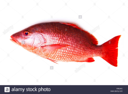

In [28]:
im.to_thumb(128,128)

In [59]:
failed = verify_images(fns)

In [60]:
failed

(#0) []

In [52]:
failed.map(Path.unlink);

FileNotFoundError: ignored

In [71]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=10),
    get_y=parent_label,
    item_tfms=Resize(128))

In [72]:
dls = data.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


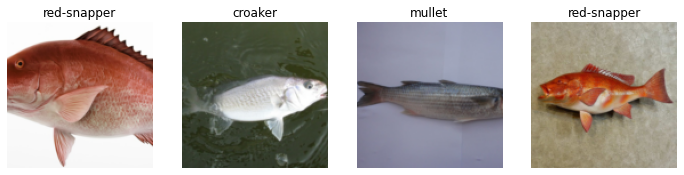

In [73]:
dls.train.show_batch(max_n=4,nrows=1)

In [74]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [75]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.726632,1.226382,0.363636,00:15


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.819199,0.726758,0.256198,00:15
1,0.661037,0.547918,0.198347,00:15
2,0.490917,0.500430,0.140496,00:15
3,0.395299,0.508629,0.157025,00:15
4,0.327209,0.507185,0.165289,00:15


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

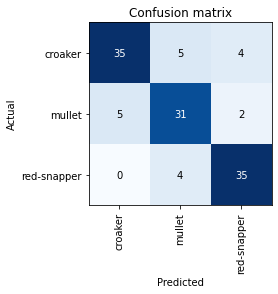

In [76]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [62]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.024296,0.687893,0.165289,00:16


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.027205,0.739830,0.181818,00:16
1,0.018071,0.803329,0.165289,00:16
2,0.016501,0.721058,0.148760,00:16
3,0.015661,0.861545,0.165289,00:16
4,0.013120,0.893697,0.157025,00:16
5,0.012484,0.896747,0.148760,00:16
6,0.010999,0.901035,0.157025,00:16
7,0.011490,0.851683,0.148760,00:16
8,0.010734,0.837203,0.140496,00:16
9,0.009393,0.836800,0.140496,00:16


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

In [77]:
learn.predict('/content/gdrive/My Drive/fish.jpg')

('mullet', tensor(1), tensor([0.4042, 0.5823, 0.0135]))

In [79]:
learn.predict('/content/gdrive/My Drive/fish (1).jpg')

('mullet', tensor(1), tensor([0.3043, 0.6637, 0.0320]))